In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [64]:
df = pd.read_csv("diabetes.csv")

In [65]:
df.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [66]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

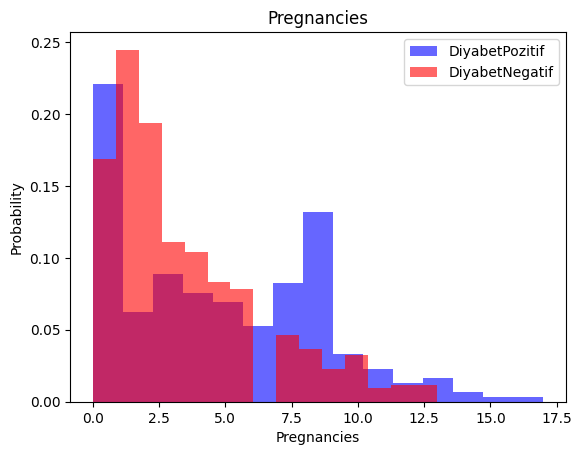

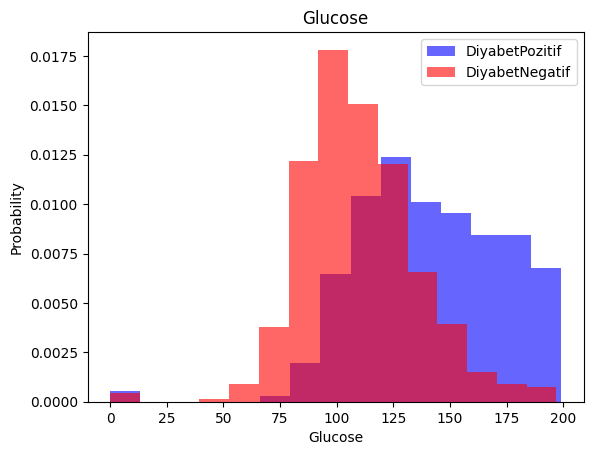

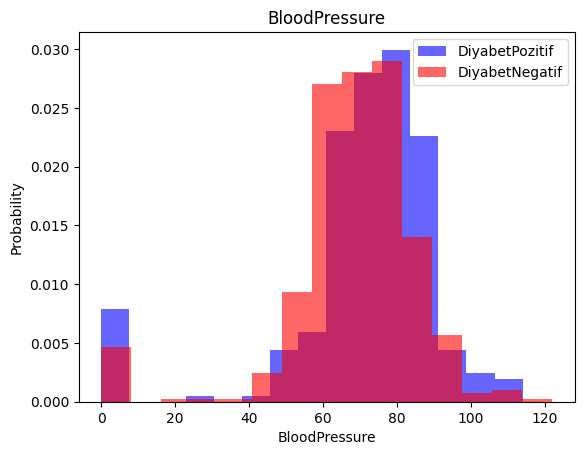

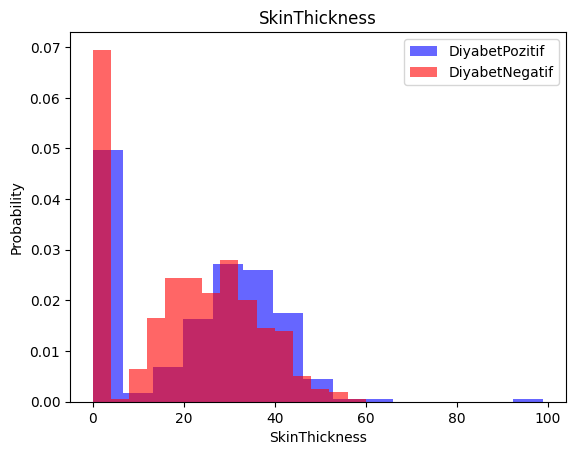

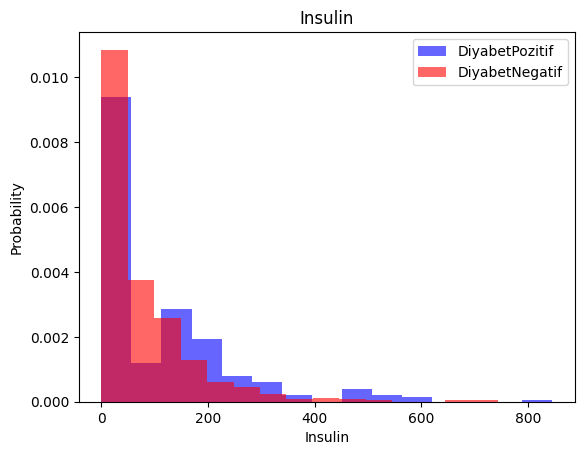

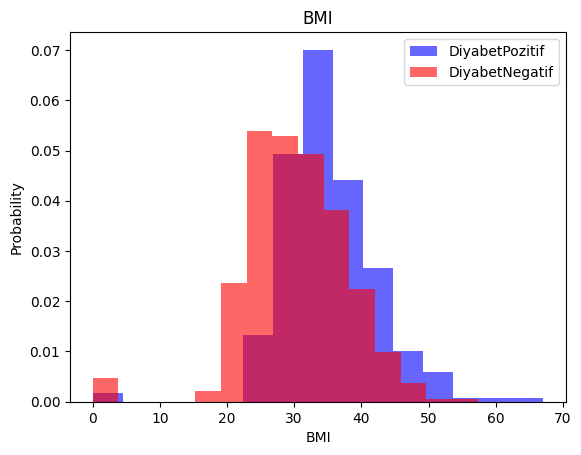

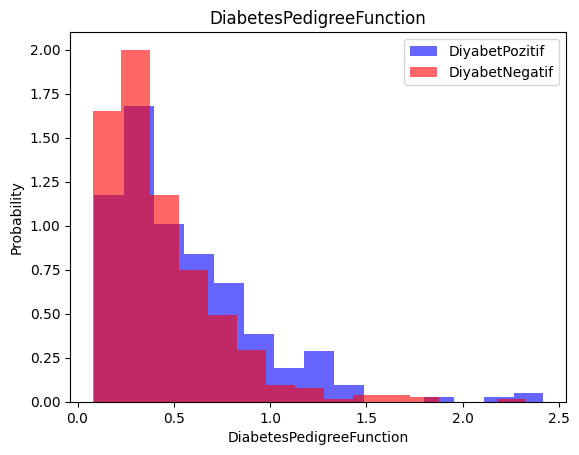

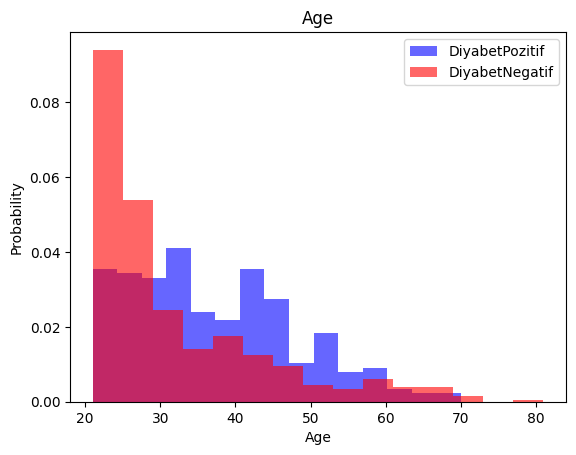

In [67]:
for i in range(len(df.columns[:-1])):       #sondaki hariç (Outcome) tüm kolonları forda dön
    label=df.columns[i]                     #tane tane döndüğün kolonları label değişkenine ata
    plt.hist(df[df["Outcome"]==1][label] , color='blue' , label='DiyabetPozitif' , alpha = 0.6 , density=True , bins=15)   #+ olanlarla dönülen katagorilerin histogramı
    plt.hist(df[df["Outcome"]==0][label] , color='red' , label='DiyabetNegatif' , alpha = 0.6 , density=True , bins=15)    #- olanlarla dönülen katagorilerin histogramı
    plt.title(label)    #His adı o an ne deönüyosa o olsun
    plt.ylabel("Probability")  #Outcome ihtimali 0 yada 1 y ekseninde
    plt.xlabel(label)          #Dönülen katagori x ekseninde
    plt.legend()
    plt.show()

Sonradan ekleme değerler daha düzenlendi

In [68]:
x = df[df.columns[:-1]].values            #x=sondaki hariç tüm kolonlar tam liste değerleri
y = df[df.columns[-1]].values             #y=son kolon (Outcome) sonuç olasılığı 1 yada 0 değerleri

In [69]:
x , y

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [85]:
x.shape , y.shape                 # x=2 , y = 1 boyutlu datalar , beraber işlemek için y=2 şekillendirmemiz lazım

((1000, 8), (1000,))

In [84]:
scaler = StandardScaler()
x = scaler.fit_transform(x)     #x i sığdırıp dönüştürme işlemi
data = np.hstack((x, np.reshape(y, (-1, 1))))   #data değişkenini yeni x ve 2 boyutlandırılmış y ile YAN YANA ekliyoruz(horizontalstack)
transformed_df = pd.DataFrame(data,columns=df.columns) #son olarak transdata = yeni datamız ve aynı kolonlar kullanarak oluşturuyorum

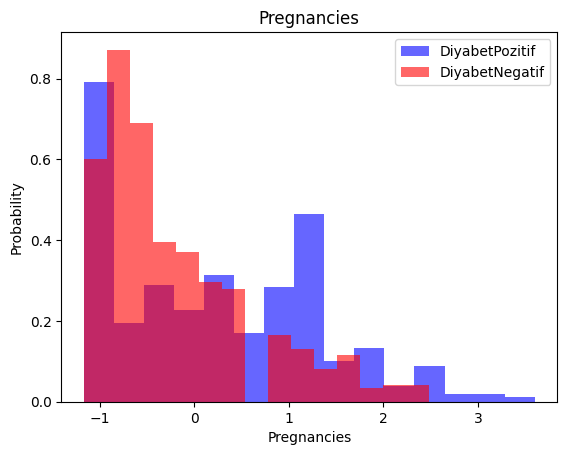

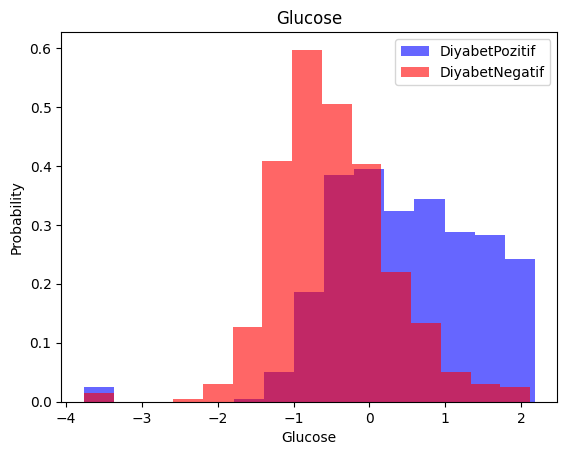

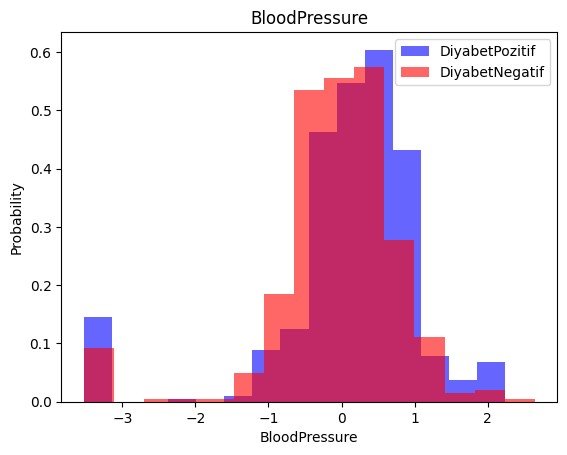

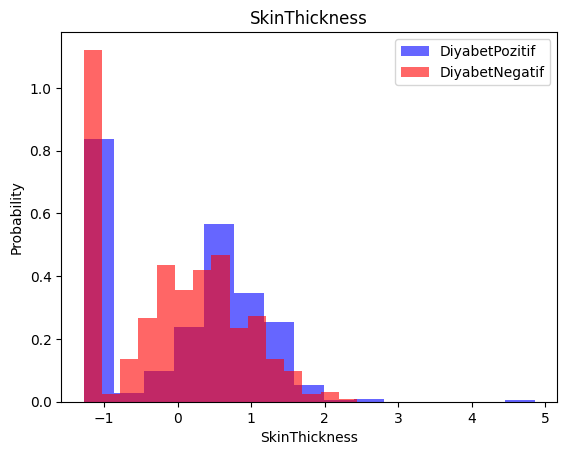

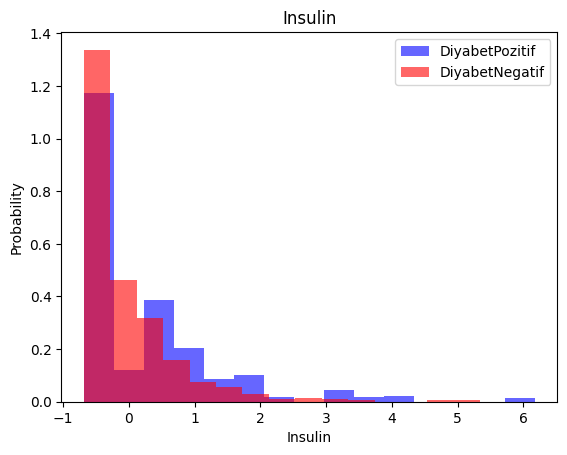

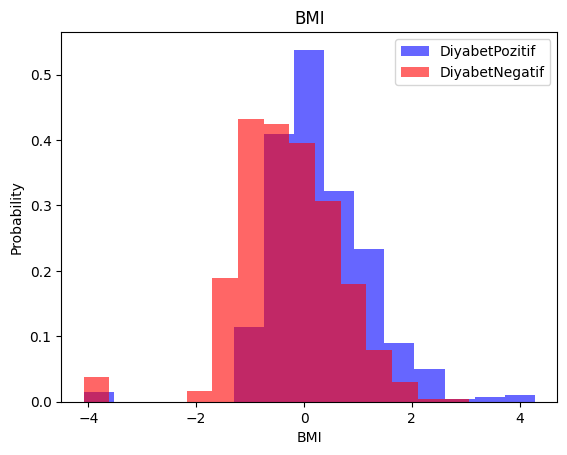

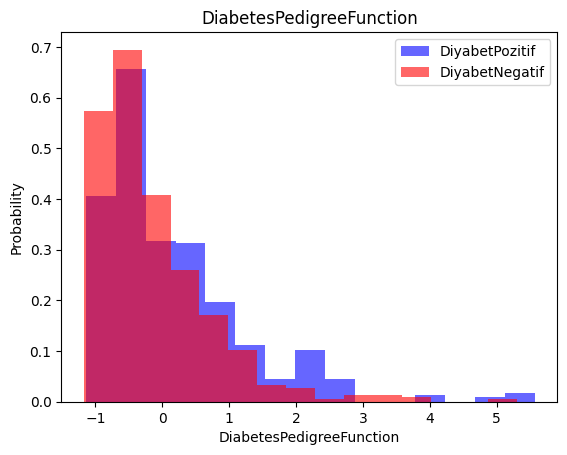

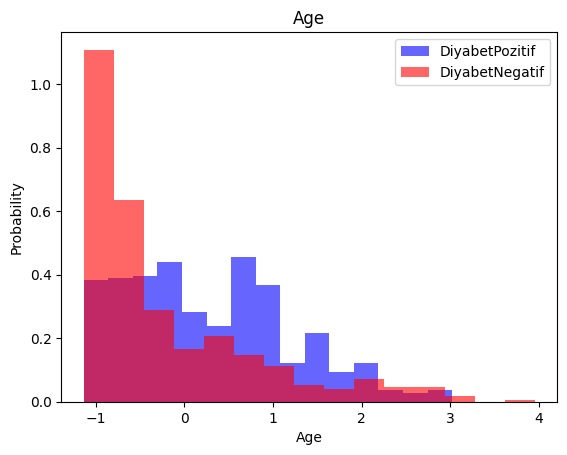

In [86]:
       
  #YUKARIDAKİ HİSTOGRAM ÇİZİMLERİNİ YENİ DF İLE ÇİZİYORUM 

for i in range(len(df.columns[:-1])):       #sondaki hariç (Outcome) tüm kolonları forda dön
    label=df.columns[i]                     #tane tane döndüğün kolonları label değişkenine ata
    plt.hist(transformed_df[transformed_df["Outcome"]==1][label] , color='blue' , label='DiyabetPozitif' , alpha = 0.6 , density=True , bins=15)   #+ olanlarla dönülen katagorilerin histogramı
    plt.hist(transformed_df[transformed_df["Outcome"]==0][label] , color='red' , label='DiyabetNegatif' , alpha = 0.6 , density=True , bins=15)    #- olanlarla dönülen katagorilerin histogramı
    plt.title(label)    #His adı o an ne deönüyosa o olsun
    plt.ylabel("Probability")  #Outcome ihtimali 0 yada 1 y ekseninde
    plt.xlabel(label)          #Dönülen katagori x ekseninde
    plt.legend()
    plt.show()


In [87]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])


(500, 500)

In [74]:
# + - dağılımı dengesiz eşitleyip yapılan test daha sasğlıklı olur


In [88]:
over = RandomOverSampler()                               #oversamplerı bi dewğişkene ata
x , y = over.fit_resample(x,y)                           # x ve y yi sğıdır ve yeniden samplela
data = np.hstack((x,np.reshape(y,(-1,+1))))              #data değişkenine np+yanına yeni sample ekle
transformed_df = pd.DataFrame(data, columns=df.columns)  #transdf data ve column isimleri olsun

In [89]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)  #datanın %40 ı test datası ayırıyorum random_state hep aynı data(%40) almamı sağlıyor 
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0) #geçici (temp) datayı da değerlendirme ve test e bölüyorum
#bu bölüş saçma daha yönet teknikler var

In [90]:
model = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'), # relu eğer x <= 0 --> 0, x > 0 --> x
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(1, activation="sigmoid") # binary classification tek sınıflandırma
])
#TF model örneği Sequential modelini kullandım 2 kere 16 katman ve 1 son çıkışlı NN düzeni 
#SEQUENTİAL doğrusal bir katman yığınını(stack) bir tf.kerasModel'de gruplandırır

In [91]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),    #Optimizer seçimi sıkıntılı yaygın olan Adam algoritmasını kullandım
              loss=tf.keras.losses.BinaryCrossentropy(),                 #Binary sınıflandırma yaptığımdan
              metrics=['accuracy'])                                       #ne kadarını doğru bildik anlamak için      

In [92]:
model.evaluate(x_train,y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.8640 - accuracy: 0.4917


[0.8640195727348328, 0.49166667461395264]

In [93]:
model.evaluate(x_valid,y_valid)
#EĞİTİM YAPARSAM ORANLAR DÜZELECEK

7/7 [==============================] - 0s 2ms/step - loss: 0.8431 - accuracy: 0.5350


[0.8431037068367004, 0.5350000262260437]

In [94]:
model.fit(x_train,y_train , batch_size=16 , epochs=20 , validation_data=(x_valid,y_valid))
#Modele x y verdim bach size kaç datayı epochs kaç iteleme eğiticek ayarlarıdır validation_data ise ne tutmuş ne kaçmış değerlendirir

Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 0.7813 - accuracy: 0.5050 - val_loss: 0.7165 - val_accuracy: 0.5650
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.5550 - val_loss: 0.6609 - val_accuracy: 0.6100
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6325 - accuracy: 0.6950 - val_loss: 0.6222 - val_accuracy: 0.6750
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5946 - accuracy: 0.7233 - val_loss: 0.5863 - val_accuracy: 0.6900
Epoch 5/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5646 - accuracy: 0.7267 - val_loss: 0.5570 - val_accuracy: 0.7050
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5403 - accuracy: 0.7350 - val_loss: 0.5393 - val_accuracy: 0.6900
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5255 - accuracy: 0.7367 - val_loss: 0.5243 - val_accuracy: 0.7150
Epoch 8/20
38/38 [==

In [95]:
#DEĞERLER İYİ LAKİN DAHA İYİSİ OLABİLİR DEĞER ARALIKLARI ÇOK GENİŞ OLDUĞUNDAN SONUCU KÖTÜ ETKİLEYEBİLİR DÜZELTİRSEM DAHA İSABETLİ TAHMİN EDEBİLİRİM
#                                               42 DEN İTİBAREN EKLİYORUM

In [97]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7500


[0.49120184779167175, 0.75]